# Лабораторная работа #2
Вариант #2

Искендеров А.С.

In [15]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

---

## Пояснение стобцов таблицы

- **classes**: edible=e, poisonous=p

- **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

- **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s

- **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, 
purple=u, red=e, white=w, yellow=y

- **bruises**: bruises=t, no=f

- **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, 
pungent=p, spicy=s

- **gill-attachment**: attached=a, descending=d, free=f, notched=n

- **gill-spacing**: close=c, crowded=w, distant=d

- **gill-size**: broad=b, narrow=n

- **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, 
orange=o, pink=p, purple=u, red=e, white=w, yellow=y

- **stalk-shape**: enlarging=e, tapering=t

- **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=?

- **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s

- **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s

- **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, 
pink=p, red=e, white=w, yellow=y

- **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, 
pink=p, red=e, white=w, yellow=y

- **veil-type**: partial=p, universal=u

- **veil-color**: brown=n, orange=o, white=w, yellow=y

- **ring-number**: none=n, one=o, two=t

- **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, 
pendant=p, sheathing=s, zone=z

- **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, 
orange=o, purple=u, white=w, yellow=y

- **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, 
solitary=y

- **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, 
woods=d


In [30]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Закодируем все значения числами.

In [31]:
df = df.apply(lambda x: x.factorize()[0])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


Посмотрим то, насколько столбцы зависят друг от друга. Нас интересует
столбец `class`, в котором находится информация о том, ядовит ли гриб.

<Axes: >

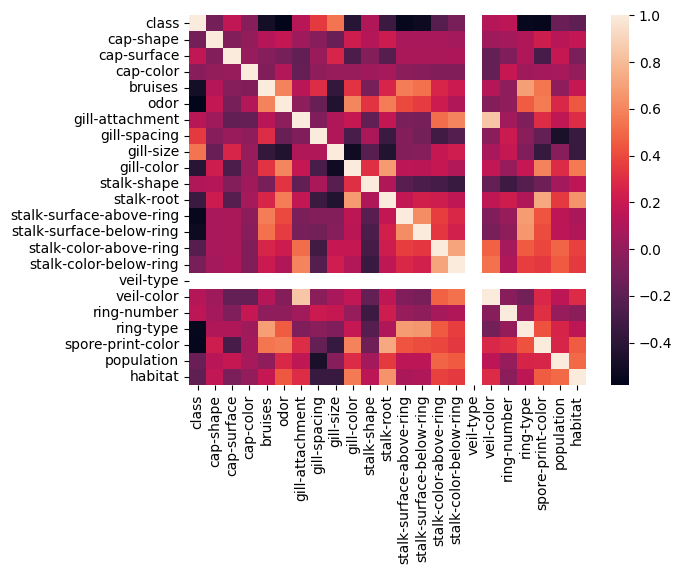

In [32]:
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)